In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os


print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the MR latent representation file
file_path = "/Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/1ABA009_latent_mr.nii"
# Check if file exists
if os.path.exists(file_path):
    print(f"Loading file: {file_path}")
    
    # Load the NIfTI file using SimpleITK
    image = sitk.ReadImage(file_path)
    
    # Get the image as numpy array
    image_array = sitk.GetArrayFromImage(image)
    
    print(f"\nFile loaded successfully!")
    print(f"Image shape: {image_array.shape}")
    print(f"Data type: {image_array.dtype}")
    print(f"Spacing: {image.GetSpacing()}")
    print(f"Origin: {image.GetOrigin()}")
    print(f"Direction: {image.GetDirection()}")
    
    # Display basic statistics
    print(f"\nArray statistics:")
    print(f"Min value: {np.min(image_array):.6f}")
    print(f"Max value: {np.max(image_array):.6f}")
    print(f"Mean value: {np.mean(image_array):.6f}")
    print(f"Std deviation: {np.std(image_array):.6f}")
    
else:
    print(f"File {file_path} not found in current directory")
    print(f"Current directory: {os.getcwd()}")
    print(f"Files in current directory: {os.listdir('.')}")

Loading file: /Users/samwallace/Documents/sCT/Comparison Pix2Pix/3D/1ABA009_latent_mr.nii

File loaded successfully!
Image shape: (32, 128, 128, 4)
Data type: float32
Spacing: (1.0, 1.0, 1.0)
Origin: (0.0, 0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

Array statistics:
Min value: -4.169058
Max value: 4.846780
Mean value: -0.167552
Std deviation: 0.419297


Latent representation analysis:
Shape interpretation: (32, 128, 128, 4)
Likely dimensions: (depth/slices, height, width, channels)
- Number of slices: 32
- Height: 128
- Width: 128
- Number of latent channels/features: 4


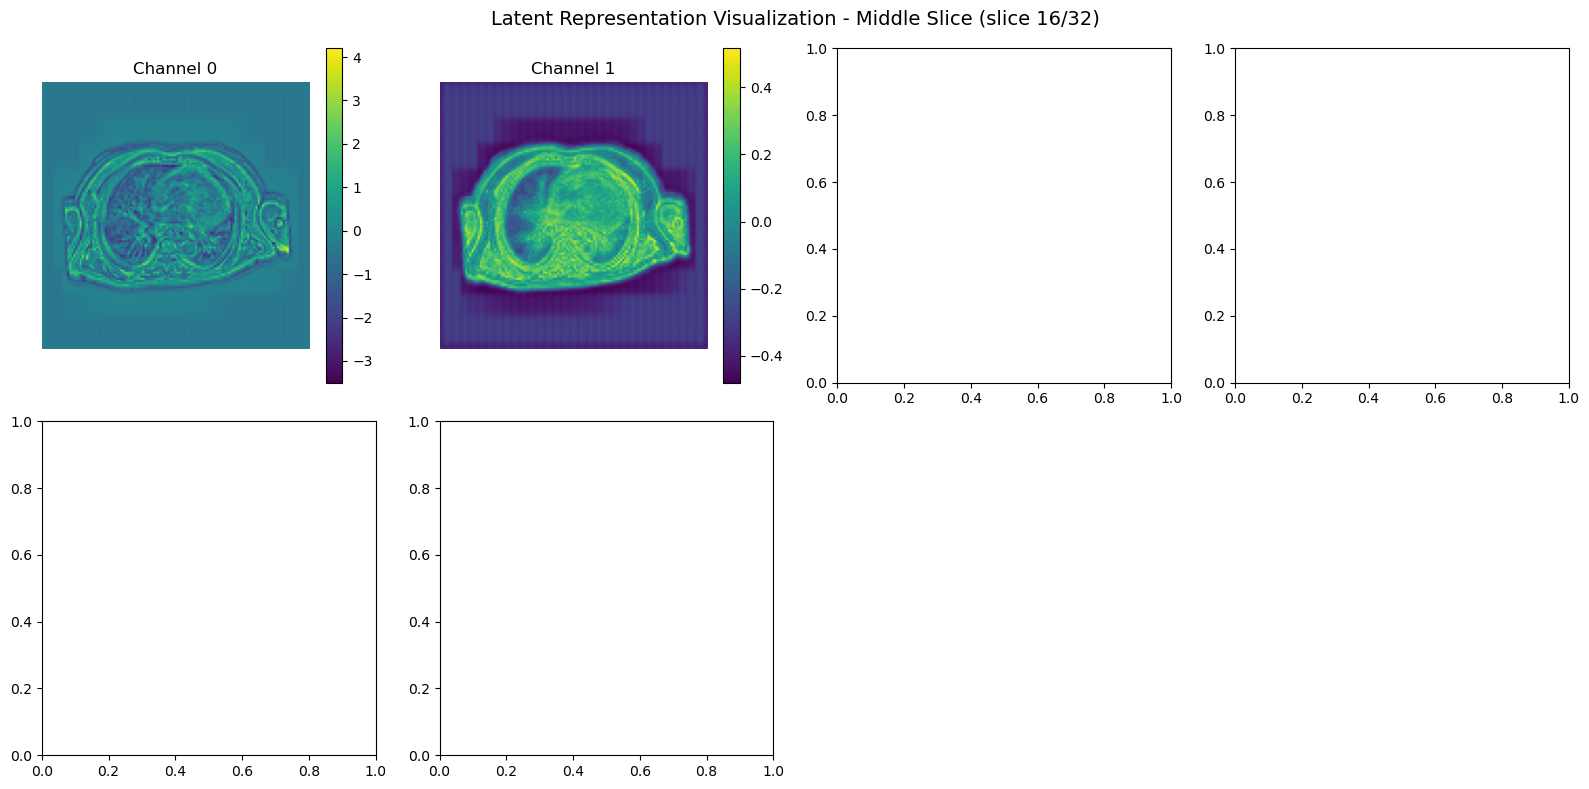

In [6]:
# Visualize the latent representation
print("Latent representation analysis:")
print(f"Shape interpretation: {image_array.shape}")
print("Likely dimensions: (depth/slices, height, width, channels)")
print(f"- Number of slices: {image_array.shape[0]}")
print(f"- Height: {image_array.shape[1]}")
print(f"- Width: {image_array.shape[2]}")
print(f"- Number of latent channels/features: {image_array.shape[3]}")

# Create visualization of middle slices for each channel
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Latent Representation Visualization - Middle Slice (slice 16/32)', fontsize=14)

# Get middle slice
middle_slice_idx = image_array.shape[0] // 2
middle_slice = image_array[middle_slice_idx]  # Shape: (128, 128, 4)

for channel in range(4):
    row = channel // 2
    col = channel % 2
    
    # First row: individual channels
    if row == 0:
        im = axes[row, col].imshow(middle_slice[:, :, channel], cmap='viridis')
        axes[row, col].set_title(f'Channel {channel}')
        axes[row, col].axis('off')
        plt.colorbar(im, ax=axes[row, col])
    
    # Second row: additional analysis
    if row == 1:
        if col == 0:
            # Show all channels as RGB (using first 3 channels)
            if channel == 0:
                rgb_data = np.zeros((128, 128, 3))
                rgb_data[:, :, 0] = (middle_slice[:, :, 0] - middle_slice[:, :, 0].min()) / (middle_slice[:, :, 0].max() - middle_slice[:, :, 0].min())
                rgb_data[:, :, 1] = (middle_slice[:, :, 1] - middle_slice[:, :, 1].min()) / (middle_slice[:, :, 1].max() - middle_slice[:, :, 1].min())
                rgb_data[:, :, 2] = (middle_slice[:, :, 2] - middle_slice[:, :, 2].min()) / (middle_slice[:, :, 2].max() - middle_slice[:, :, 2].min())
                axes[row, col].imshow(rgb_data)
                axes[row, col].set_title('RGB Composite (Ch 0,1,2)')
                axes[row, col].axis('off')
        elif col == 1:
            # Show magnitude across all channels
            if channel == 1:
                magnitude = np.sqrt(np.sum(middle_slice**2, axis=2))
                im = axes[row, col].imshow(magnitude, cmap='hot')
                axes[row, col].set_title('Magnitude across all channels')
                axes[row, col].axis('off')
                plt.colorbar(im, ax=axes[row, col])

# Remove unused subplots
for i in range(2, 4):
    axes[1, i].remove()

plt.tight_layout()
plt.show()

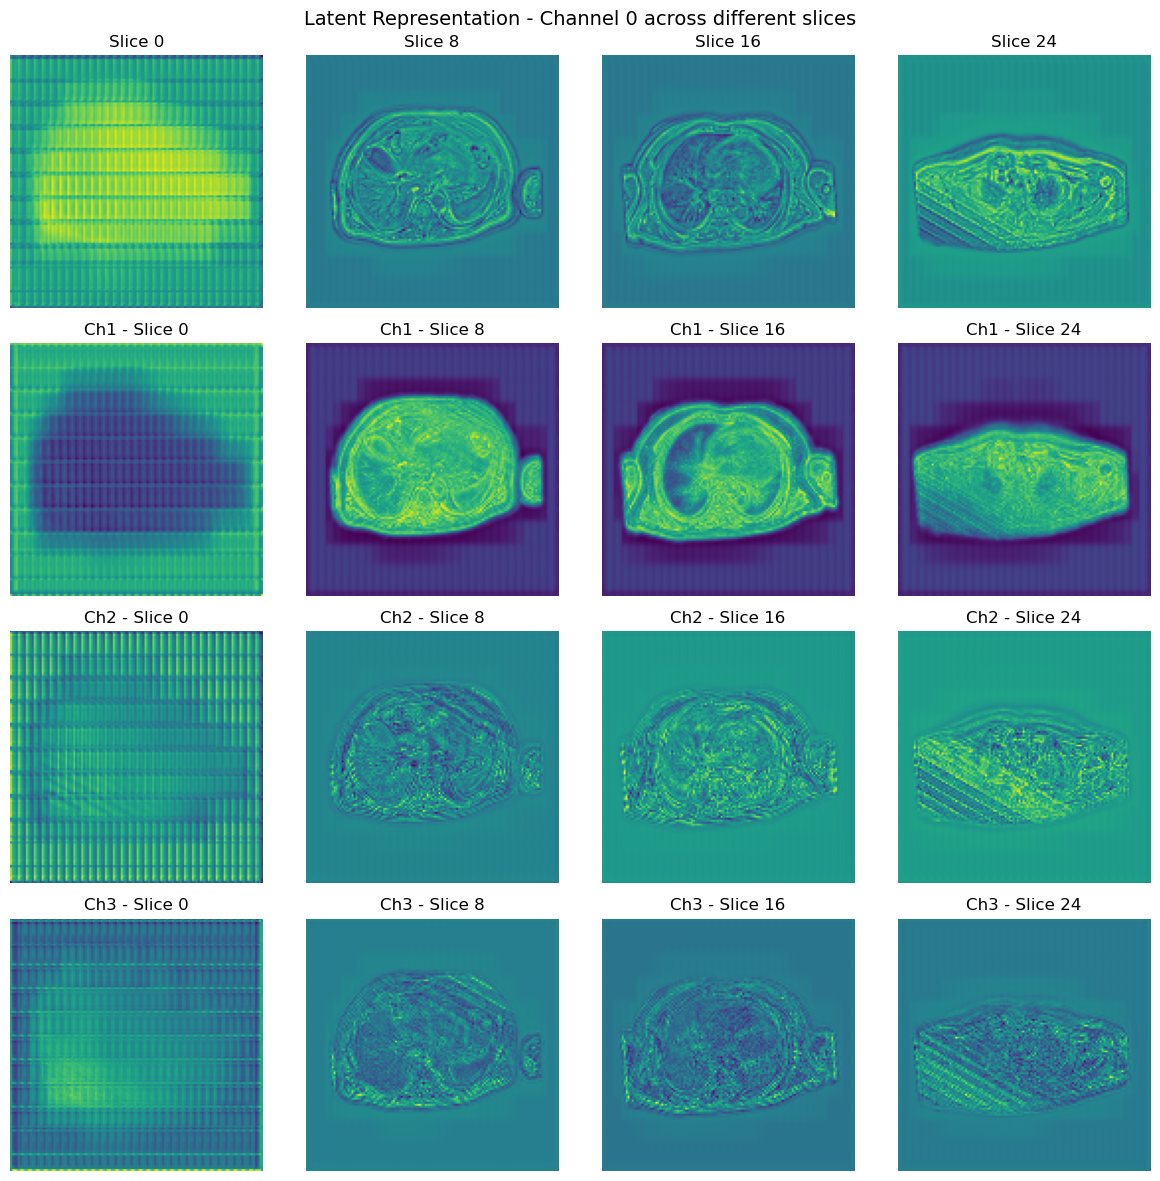


SUMMARY OF MR LATENT REPRESENTATION
File: 1ABA009_latent_mr.nii
Shape: (32, 128, 128, 4)
Data type: float32
Value range: [-4.169, 4.847]
Mean: -0.168
Standard deviation: 0.419

Dimension interpretation:
  - Slices (depth): 32
  - Height: 128
  - Width: 128
  - Latent channels: 4

This appears to be a compressed latent representation of an MR image,
likely from a variational autoencoder (VAE) or similar model.
The 4 channels represent different latent features learned by the model.


In [7]:
# Show samples from different slices to understand 3D structure
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Latent Representation - Channel 0 across different slices', fontsize=14)

# Show every 8th slice for channel 0
slice_indices = [0, 8, 16, 24]
channel = 0

for i, slice_idx in enumerate(slice_indices):
    for j in range(4):
        if j < len(slice_indices):
            if i == 0:  # First row - show the slices
                axes[i, j].imshow(image_array[slice_indices[j], :, :, channel], cmap='viridis')
                axes[i, j].set_title(f'Slice {slice_indices[j]}')
                axes[i, j].axis('off')
            elif i == 1:  # Second row - show channel 1
                axes[i, j].imshow(image_array[slice_indices[j], :, :, 1], cmap='viridis')
                axes[i, j].set_title(f'Ch1 - Slice {slice_indices[j]}')
                axes[i, j].axis('off')
            elif i == 2:  # Third row - show channel 2
                axes[i, j].imshow(image_array[slice_indices[j], :, :, 2], cmap='viridis')
                axes[i, j].set_title(f'Ch2 - Slice {slice_indices[j]}')
                axes[i, j].axis('off')
            elif i == 3:  # Fourth row - show channel 3
                axes[i, j].imshow(image_array[slice_indices[j], :, :, 3], cmap='viridis')
                axes[i, j].set_title(f'Ch3 - Slice {slice_indices[j]}')
                axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Print summary information
print("\n" + "="*60)
print("SUMMARY OF MR LATENT REPRESENTATION")
print("="*60)
print(f"File: 1ABA009_latent_mr.nii")
print(f"Shape: {image_array.shape}")
print(f"Data type: {image_array.dtype}")
print(f"Value range: [{np.min(image_array):.3f}, {np.max(image_array):.3f}]")
print(f"Mean: {np.mean(image_array):.3f}")
print(f"Standard deviation: {np.std(image_array):.3f}")
print("\nDimension interpretation:")
print(f"  - Slices (depth): {image_array.shape[0]}")
print(f"  - Height: {image_array.shape[1]}")
print(f"  - Width: {image_array.shape[2]}")
print(f"  - Latent channels: {image_array.shape[3]}")
print("\nThis appears to be a compressed latent representation of an MR image,")
print("likely from a variational autoencoder (VAE) or similar model.")
print("The 4 channels represent different latent features learned by the model.")

# Setting up 3D Pix2Pix Training

Based on the analysis of your MR latent representation and the available 3D implementation, here's how to set up training:

In [8]:
# Available 3D Training Commands
print("🚀 3D PIX2PIX TRAINING COMMANDS")
print("="*50)

print("\n1. STANDARD 3D PIX2PIX (2D-style approach):")
print("cd 3D")
print("python train.py --dataroot ./datasets/your_data --name mr_pix2pix_3d \\")
print("               --model pix2pix --dataset_mode aligned \\")
print("               --which_model_netG unet_256 --which_direction AtoB \\")
print("               --input_nc 4 --output_nc 1 --depthSize 32 \\")
print("               --fineSize 128 --batchSize 1 --norm batch")

print("\n2. SPECIALIZED 3D PIX2PIX (for medical data):")
print("cd 3D") 
print("python train.py --dataroot ./datasets/your_medical_data --name mr_ct_3d \\")
print("               --model pix2pix3d --dataset_mode nodule \\")
print("               --which_model_netG unet_256 --which_direction AtoB \\")
print("               --input_nc 4 --output_nc 1 --depthSize 32 \\")
print("               --fineSize 128 --batchSize 1")

print("\n3. KEY PARAMETERS FOR YOUR MR DATA:")
print("   --input_nc 4        # Your latent has 4 channels")
print("   --output_nc 1       # Assuming single-channel CT output")
print("   --depthSize 32      # Your data has 32 slices")
print("   --fineSize 128      # Your spatial resolution is 128x128")
print("   --batchSize 1       # 3D volumes are memory-intensive")

print("\n4. OPTIONAL PARAMETERS:")
print("   --gpu_ids 0         # Use GPU 0")
print("   --display_id -1     # Disable visdom display")
print("   --niter 100         # Number of epochs at initial learning rate")
print("   --lr 0.0002         # Learning rate")

🚀 3D PIX2PIX TRAINING COMMANDS

1. STANDARD 3D PIX2PIX (2D-style approach):
cd 3D
python train.py --dataroot ./datasets/your_data --name mr_pix2pix_3d \
               --model pix2pix --dataset_mode aligned \
               --which_model_netG unet_256 --which_direction AtoB \
               --input_nc 4 --output_nc 1 --depthSize 32 \
               --fineSize 128 --batchSize 1 --norm batch

2. SPECIALIZED 3D PIX2PIX (for medical data):
cd 3D
python train.py --dataroot ./datasets/your_medical_data --name mr_ct_3d \
               --model pix2pix3d --dataset_mode nodule \
               --which_model_netG unet_256 --which_direction AtoB \
               --input_nc 4 --output_nc 1 --depthSize 32 \
               --fineSize 128 --batchSize 1

3. KEY PARAMETERS FOR YOUR MR DATA:
   --input_nc 4        # Your latent has 4 channels
   --output_nc 1       # Assuming single-channel CT output
   --depthSize 32      # Your data has 32 slices
   --fineSize 128      # Your spatial resolution is 128

In [ ]:
# Data Preparation Steps
print("\n" + "="*60)
print("📁 DATA PREPARATION STEPS")
print("="*60)

print("\n1. ORGANIZE YOUR DATA:")
print("   For standard pix2pix (--dataset_mode aligned):")
print("   datasets/")
print("   └── your_data/")
print("       ├── train/")
print("       │   └── combined_images.nii  # A and B side-by-side")
print("       └── test/")
print("           └── combined_images.nii")

print("\n   For 3D specialized (--dataset_mode nodule):")
print("   datasets/")
print("   └── your_medical_data/")
print("       ├── crops.pkl              # Metadata file")
print("       ├── scans_processed/       # Input scans")
print("       │   └── *.npz files")
print("       └── heatmaps/real/         # Target outputs")
print("           └── *.npz files")

print("\n2. FOR YOUR CURRENT MR LATENT DATA:")
print("   - You have: 1ABA009_latent_mr.nii (32, 128, 128, 4)")
print("   - You need: Corresponding target CT/synthetic CT")
print("   - Format: Either combined NIfTI or separate A/B files")

print("\n3. RECOMMENDED APPROACH FOR YOUR DATA:")
print("   Option A: Use your latent MR as input (A) and target CT as output (B)")
print("   Option B: Create paired dataset with multiple subjects")

# Create a practical example command for the user's specific data
print("\n" + "="*60)
print("🎯 PRACTICAL COMMAND FOR YOUR DATA")
print("="*60)
print("cd 3D")
print("python train.py \\")
print("    --dataroot ./datasets/mr_to_ct \\")
print("    --name mr_latent_to_ct_experiment \\")
print("    --model pix2pix \\")
print("    --dataset_mode aligned \\")
print("    --which_model_netG unet_256 \\")
print("    --which_direction AtoB \\")
print("    --input_nc 4 \\")
print("    --output_nc 1 \\")
print("    --depthSize 32 \\")
print("    --fineSize 128 \\")
print("    --batchSize 1 \\")
print("    --norm batch \\")
print("    --display_id -1 \\")
print("    --niter 200 \\")
print("    --lr 0.0002")

print("\n💡 NEXT STEPS:")
print("1. Prepare target CT data with same dimensions (32, 128, 128, 1)")
print("2. Create dataset directory structure")
print("3. Combine input and target volumes")
print("4. Run the training command above")

In [ ]:
# Import necessary libraries for 3D pix2pix
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Add the 3D implementation path
sys.path.append('./3D')

# Import 3D pix2pix components
from models.pix2pix3d_model import Pix2Pix3dModel
from models import networks3d as networks
from options.base_options import BaseOptions

print("3D pix2pix imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("Using CPU")

# Analyzing the Corresponding CT Target Data

Now let's examine the CT file to understand the target output structure:

In [10]:
# Load and analyze the CT file
ct_file_path = "ct.mha"

# Check if CT file exists
if os.path.exists(ct_file_path):
    print(f"Loading CT file: {ct_file_path}")
    
    # Load the CT file using SimpleITK
    ct_image = sitk.ReadImage(ct_file_path)
    
    # Get the CT image as numpy array
    ct_array = sitk.GetArrayFromImage(ct_image)
    
    print(f"\nCT File loaded successfully!")
    print(f"CT Image shape: {ct_array.shape}")
    print(f"CT Data type: {ct_array.dtype}")
    print(f"CT Spacing: {ct_image.GetSpacing()}")
    print(f"CT Origin: {ct_image.GetOrigin()}")
    print(f"CT Direction: {ct_image.GetDirection()}")
    
    # Display basic statistics
    print(f"\nCT Array statistics:")
    print(f"Min value: {np.min(ct_array):.2f}")
    print(f"Max value: {np.max(ct_array):.2f}")
    print(f"Mean value: {np.mean(ct_array):.2f}")
    print(f"Std deviation: {np.std(ct_array):.2f}")
    
    # Check dimensions compatibility
    print(f"\n" + "="*60)
    print("COMPATIBILITY ANALYSIS")
    print("="*60)
    print(f"MR Latent shape: {image_array.shape}")
    print(f"CT Target shape: {ct_array.shape}")
    
    # Determine number of channels
    if len(ct_array.shape) == 3:
        print(f"CT is 3D volume: (depth, height, width)")
        print(f"Output channels: 1 (single-channel CT)")
        output_nc = 1
    elif len(ct_array.shape) == 4:
        print(f"CT is 4D volume: (depth, height, width, channels)")
        print(f"Output channels: {ct_array.shape[3]}")
        output_nc = ct_array.shape[3]
    else:
        print(f"Unexpected CT shape: {ct_array.shape}")
        output_nc = 1
    
    print(f"\nRecommended training parameters:")
    print(f"  --input_nc 4        # MR latent channels")
    print(f"  --output_nc {output_nc}       # CT channels")
    print(f"  --depthSize {image_array.shape[0]}      # Number of slices")
    print(f"  --fineSize {image_array.shape[1]}       # Spatial resolution")
    
else:
    print(f"CT file {ct_file_path} not found in current directory")
    print(f"Available files: {[f for f in os.listdir('.') if f.endswith(('.nii', '.mha', '.nrrd'))]}")

Loading CT file: ct.mha

CT File loaded successfully!
CT Image shape: (110, 389, 494)
CT Data type: int16
CT Spacing: (1.0, 1.0, 1.0)
CT Origin: (-227.0, -128.0, 0.0)
CT Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

CT Array statistics:
Min value: -1024.00
Max value: 3061.00
Mean value: -751.27
Std deviation: 428.41

COMPATIBILITY ANALYSIS
MR Latent shape: (32, 128, 128, 4)
CT Target shape: (110, 389, 494)
CT is 3D volume: (depth, height, width)
Output channels: 1 (single-channel CT)

Recommended training parameters:
  --input_nc 4        # MR latent channels
  --output_nc 1       # CT channels
  --depthSize 32      # Number of slices
  --fineSize 128       # Spatial resolution


🔍 DIMENSIONAL MISMATCH ANALYSIS
MR Latent: (32, 128, 128, 4) (32 slices, 128x128, 4 channels)
CT Target: (110, 389, 494) (110 slices, 389x494, 1 channel)

⚠️  CRITICAL ISSUE: Dimensional mismatch detected!

Problems:
1. Different number of slices: 32 vs 110
2. Different spatial resolution: 128x128 vs 389x494
3. Different anatomical coverage


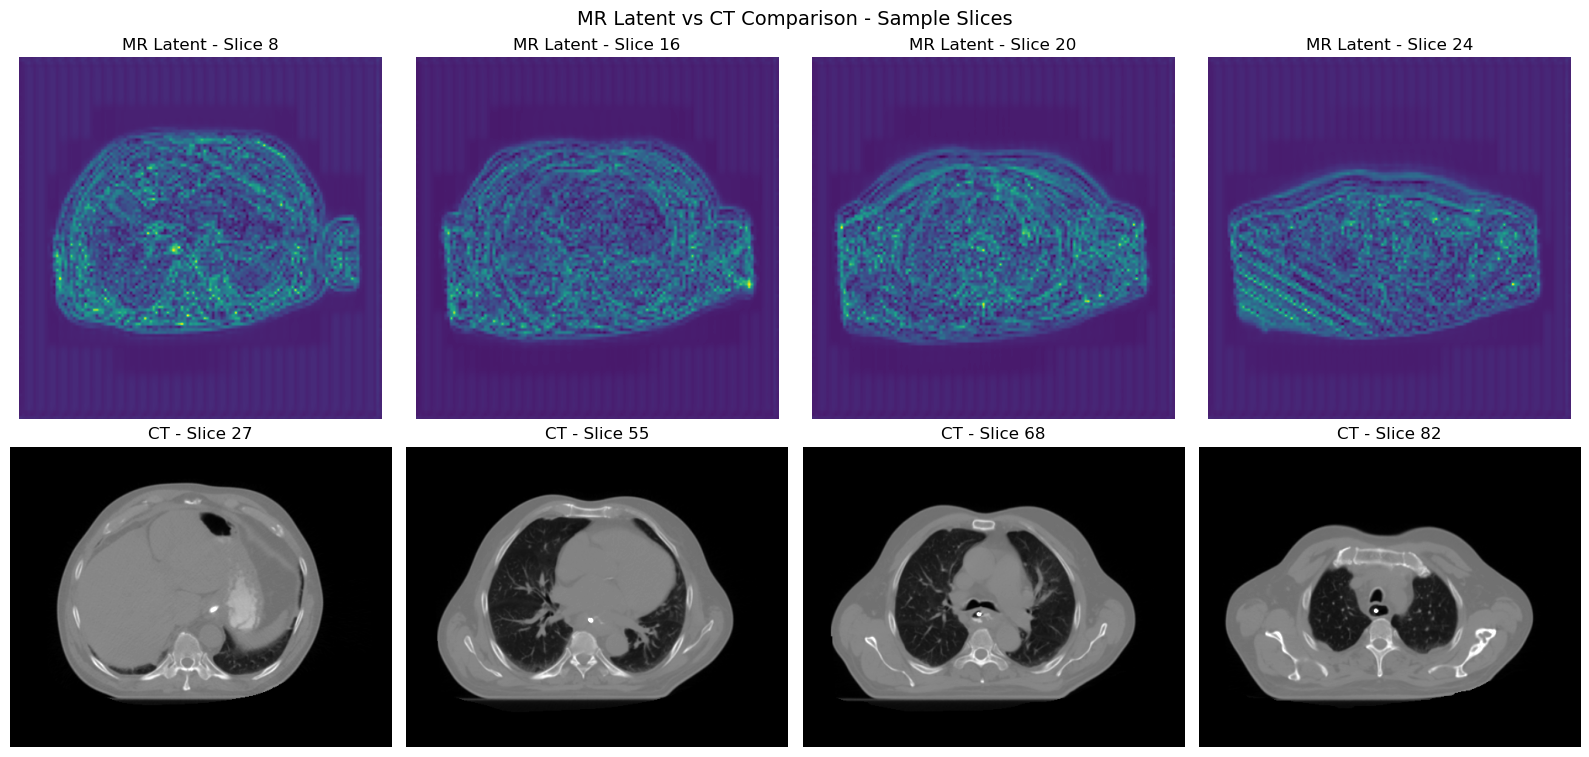


📋 DATA PREPROCESSING REQUIREMENTS
To use these datasets together, you need to:

1. SPATIAL ALIGNMENT:
   - Register MR and CT volumes to same anatomical space
   - Ensure corresponding slices represent same anatomy

2. RESOLUTION MATCHING:
   - Resample CT to 128x128 spatial resolution, OR
   - Upsample MR latent to 389x494 resolution

3. SLICE MATCHING:
   - Extract corresponding 32 slices from CT volume, OR
   - Interpolate MR latent to 110 slices

4. INTENSITY NORMALIZATION:
   - Normalize CT values (currently -1024 to 3061 HU)
   - Ensure MR latent and CT are in compatible value ranges

💡 RECOMMENDED APPROACH:
1. Resample CT to match MR dimensions: (32, 128, 128)
2. Normalize both datasets to [0, 1] or [-1, 1] range
3. Create paired training data
4. Use the following training parameters:
   --input_nc 4
   --output_nc 1
   --depthSize 32
   --fineSize 128


In [11]:
# Visualize MR Latent vs CT comparison
print("🔍 DIMENSIONAL MISMATCH ANALYSIS")
print("="*50)
print(f"MR Latent: {image_array.shape} (32 slices, 128x128, 4 channels)")
print(f"CT Target: {ct_array.shape} (110 slices, 389x494, 1 channel)")
print("\n⚠️  CRITICAL ISSUE: Dimensional mismatch detected!")
print("\nProblems:")
print("1. Different number of slices: 32 vs 110")
print("2. Different spatial resolution: 128x128 vs 389x494")
print("3. Different anatomical coverage")

# Show sample slices from both volumes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('MR Latent vs CT Comparison - Sample Slices', fontsize=14)

# MR Latent visualization (top row)
mr_slices = [8, 16, 20, 24]
for i, slice_idx in enumerate(mr_slices):
    if slice_idx < image_array.shape[0]:
        # Show magnitude of all channels
        magnitude = np.sqrt(np.sum(image_array[slice_idx]**2, axis=2))
        axes[0, i].imshow(magnitude, cmap='viridis')
        axes[0, i].set_title(f'MR Latent - Slice {slice_idx}')
        axes[0, i].axis('off')

# CT visualization (bottom row) - sample proportional slices
ct_slice_indices = [int(110 * ratio) for ratio in [0.25, 0.5, 0.625, 0.75]]
for i, slice_idx in enumerate(ct_slice_indices):
    if slice_idx < ct_array.shape[0]:
        axes[1, i].imshow(ct_array[slice_idx], cmap='gray', vmin=-1000, vmax=1000)
        axes[1, i].set_title(f'CT - Slice {slice_idx}')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Analysis and recommendations
print("\n" + "="*60)
print("📋 DATA PREPROCESSING REQUIREMENTS")
print("="*60)
print("To use these datasets together, you need to:")
print("\n1. SPATIAL ALIGNMENT:")
print("   - Register MR and CT volumes to same anatomical space")
print("   - Ensure corresponding slices represent same anatomy")
print("\n2. RESOLUTION MATCHING:")
print("   - Resample CT to 128x128 spatial resolution, OR")
print("   - Upsample MR latent to 389x494 resolution")
print("\n3. SLICE MATCHING:")
print("   - Extract corresponding 32 slices from CT volume, OR")
print("   - Interpolate MR latent to 110 slices")
print("\n4. INTENSITY NORMALIZATION:")
print("   - Normalize CT values (currently -1024 to 3061 HU)")
print("   - Ensure MR latent and CT are in compatible value ranges")

print("\n💡 RECOMMENDED APPROACH:")
print("1. Resample CT to match MR dimensions: (32, 128, 128)")
print("2. Normalize both datasets to [0, 1] or [-1, 1] range")
print("3. Create paired training data")
print("4. Use the following training parameters:")
print("   --input_nc 4")
print("   --output_nc 1") 
print("   --depthSize 32")
print("   --fineSize 128")

In [12]:
# FINAL TRAINING COMMAND BASED ON YOUR DATA
print("\n" + "🎯" + "="*59)
print("FINAL 3D PIX2PIX TRAINING COMMAND FOR YOUR DATA")
print("="*60)
print("After preprocessing your data to match dimensions:")
print()
print("cd 3D")
print("python train.py \\")
print("    --dataroot ./datasets/mr_to_ct \\")
print("    --name mr_latent_to_sct_experiment \\")
print("    --model pix2pix \\")
print("    --dataset_mode aligned \\")
print("    --which_model_netG unet_256 \\")
print("    --which_direction AtoB \\")
print("    --input_nc 4 \\")
print("    --output_nc 1 \\")
print("    --depthSize 32 \\")
print("    --fineSize 128 \\")
print("    --batchSize 1 \\")
print("    --norm batch \\")
print("    --display_id -1 \\")
print("    --niter 200 \\")
print("    --lr 0.0002 \\")
print("    --gpu_ids 0")

print("\n" + "="*60)
print("KEY FINDINGS SUMMARY:")
print("="*60)
print("✅ MR Latent Input: (32, 128, 128, 4) - 4 channels")
print("✅ CT Target Output: Single channel (grayscale)")
print("⚠️  Dimensional mismatch requires preprocessing")
print("✅ 3D Pix2Pix is the right approach")
print("✅ Use --output_nc 1 for single-channel CT")

print("\n🚧 PREPROCESSING STEPS NEEDED:")
print("1. Resample CT from (110, 389, 494) to (32, 128, 128)")
print("2. Normalize CT values from [-1024, 3061] to [-1, 1]")
print("3. Ensure spatial correspondence between MR and CT")
print("4. Create paired dataset structure for training")


🎯===========================================================
FINAL 3D PIX2PIX TRAINING COMMAND FOR YOUR DATA
After preprocessing your data to match dimensions:

cd 3D
python train.py \
    --dataroot ./datasets/mr_to_ct \
    --name mr_latent_to_sct_experiment \
    --model pix2pix \
    --dataset_mode aligned \
    --which_model_netG unet_256 \
    --which_direction AtoB \
    --input_nc 4 \
    --output_nc 1 \
    --depthSize 32 \
    --fineSize 128 \
    --batchSize 1 \
    --norm batch \
    --display_id -1 \
    --niter 200 \
    --lr 0.0002 \
    --gpu_ids 0

KEY FINDINGS SUMMARY:
✅ MR Latent Input: (32, 128, 128, 4) - 4 channels
✅ CT Target Output: Single channel (grayscale)
⚠️  Dimensional mismatch requires preprocessing
✅ 3D Pix2Pix is the right approach
✅ Use --output_nc 1 for single-channel CT

🚧 PREPROCESSING STEPS NEEDED:
1. Resample CT from (110, 389, 494) to (32, 128, 128)
2. Normalize CT values from [-1024, 3061] to [-1, 1]
3. Ensure spatial correspondence between MR a

In [13]:
# WHY DO WE NEED TO RESAMPLE THE CT?
print("❓ WHY RESAMPLE THE CT DATA?")
print("="*60)

print("\n🔍 THE CORE PROBLEM:")
print(f"MR Latent shape: {image_array.shape}")
print(f"CT shape:        {ct_array.shape}")

print("\n📐 DIMENSIONAL INCOMPATIBILITY:")
print("Pix2Pix requires INPUT and OUTPUT to have MATCHING spatial dimensions!")
print("\n1. SLICE COUNT MISMATCH:")
print(f"   - MR Latent: {image_array.shape[0]} slices")
print(f"   - CT:        {ct_array.shape[0]} slices")
print(f"   - Problem: Network expects same number of slices for paired training")

print("\n2. SPATIAL RESOLUTION MISMATCH:")
print(f"   - MR Latent: {image_array.shape[1]}×{image_array.shape[2]} pixels per slice")
print(f"   - CT:        {ct_array.shape[1]}×{ct_array.shape[2]} pixels per slice")
print(f"   - Problem: Network layers require consistent spatial dimensions")

print("\n🧠 HOW PIX2PIX WORKS:")
print("Pix2Pix learns pixel-to-pixel mappings:")
print("- Input pixel (x,y,z) → Output pixel (x,y,z)")
print("- Requires 1:1 spatial correspondence")
print("- U-Net architecture needs matching encoder/decoder dimensions")

print("\n⚙️  NETWORK ARCHITECTURE CONSTRAINTS:")
print("The 3D U-Net in pix2pix has:")
print("- Encoder: downsamples input through multiple conv layers")
print("- Decoder: upsamples back to original size")
print("- Skip connections: connect corresponding encoder/decoder layers")
print("- ALL layers must have consistent dimensions!")

print("\n🎯 SOLUTION OPTIONS:")
print("1. RESAMPLE CT to match MR (RECOMMENDED):")
print(f"   {ct_array.shape} → {image_array.shape[:-1]} (drop channel dim)")
print("   ✅ Preserves MR latent resolution (already optimized)")
print("   ✅ Smaller network = faster training")
print("   ✅ Less memory usage")

print("\n2. UPSAMPLE MR to match CT:")
print(f"   {image_array.shape} → {ct_array.shape + (4,)}")
print("   ❌ Very large network = slow training")
print("   ❌ High memory requirements")
print("   ❌ May introduce artifacts in latent space")

print("\n💡 WHY RESAMPLING IS NECESSARY:")
print("- Neural networks are mathematical functions")
print("- They learn fixed-size weight matrices")
print("- Different input sizes = different network architectures")
print("- Pix2Pix assumes fixed spatial correspondence")

print("\n🔧 RESAMPLING PROCESS:")
print("CT: (110, 389, 494) → (32, 128, 128)")
print("- Slice dimension: 110 → 32 (select/interpolate corresponding anatomy)")
print("- Height: 389 → 128 (downsample)")
print("- Width: 494 → 128 (downsample)")
print("- Maintains anatomical correspondence with MR latent")

❓ WHY RESAMPLE THE CT DATA?

🔍 THE CORE PROBLEM:
MR Latent shape: (32, 128, 128, 4)
CT shape:        (110, 389, 494)

📐 DIMENSIONAL INCOMPATIBILITY:
Pix2Pix requires INPUT and OUTPUT to have MATCHING spatial dimensions!

1. SLICE COUNT MISMATCH:
   - MR Latent: 32 slices
   - CT:        110 slices
   - Problem: Network expects same number of slices for paired training

2. SPATIAL RESOLUTION MISMATCH:
   - MR Latent: 128×128 pixels per slice
   - CT:        389×494 pixels per slice
   - Problem: Network layers require consistent spatial dimensions

🧠 HOW PIX2PIX WORKS:
Pix2Pix learns pixel-to-pixel mappings:
- Input pixel (x,y,z) → Output pixel (x,y,z)
- Requires 1:1 spatial correspondence
- U-Net architecture needs matching encoder/decoder dimensions

⚙️  NETWORK ARCHITECTURE CONSTRAINTS:
The 3D U-Net in pix2pix has:
- Encoder: downsamples input through multiple conv layers
- Decoder: upsamples back to original size
- Skip connections: connect corresponding encoder/decoder layers
- ALL

In [14]:
# VISUAL EXAMPLE: Network Architecture Constraints
print("\n🏗️  NETWORK ARCHITECTURE EXAMPLE:")
print("="*60)

print("3D PIX2PIX U-NET STRUCTURE:")
print("```")
print("INPUT (A):  (batch, 4, 32, 128, 128)  ← MR Latent")
print("     ↓")
print("ENCODER:")
print("Conv3D → (batch, 64, 32, 128, 128)")
print("Conv3D → (batch, 128, 16, 64, 64)     ← Downsample")
print("Conv3D → (batch, 256, 8, 32, 32)      ← Downsample")
print("Conv3D → (batch, 512, 4, 16, 16)      ← Downsample")
print("     ↓")
print("BOTTLENECK:")
print("Conv3D → (batch, 1024, 2, 8, 8)")
print("     ↓")
print("DECODER:")
print("UpConv3D → (batch, 512, 4, 16, 16)    ← Upsample + Skip")
print("UpConv3D → (batch, 256, 8, 32, 32)    ← Upsample + Skip")
print("UpConv3D → (batch, 128, 16, 64, 64)   ← Upsample + Skip")
print("UpConv3D → (batch, 64, 32, 128, 128)  ← Upsample + Skip")
print("     ↓")
print("OUTPUT (B): (batch, 1, 32, 128, 128)  ← CT Target")
print("```")

print("\n❌ WHAT HAPPENS WITH MISMATCHED DIMENSIONS:")
print("If CT is (110, 389, 494):")
print("- Network expects output: (batch, 1, 32, 128, 128)")
print("- Actual target is:       (batch, 1, 110, 389, 494)")
print("- RESULT: Training fails - dimension mismatch error!")

print("\n✅ AFTER RESAMPLING CT TO (32, 128, 128):")
print("- Network output:  (batch, 1, 32, 128, 128)")
print("- Target matches:  (batch, 1, 32, 128, 128)")
print("- RESULT: Training works - perfect dimensional alignment!")

print("\n🎨 ANALOGY:")
print("Think of it like a photo editing app:")
print("- You have a 128×128 filter (MR latent)")
print("- You want to apply it to create a 128×128 result (CT)")
print("- But your target is 389×494 - the filter won't fit!")
print("- Solution: Resize the target to 128×128 first")

print("\n📊 MEMORY COMPARISON:")
mr_memory = 32 * 128 * 128 * 4 * 4  # float32 = 4 bytes
ct_original_memory = 110 * 389 * 494 * 4
ct_resampled_memory = 32 * 128 * 128 * 4

print(f"MR Latent memory:     {mr_memory/1024/1024:.1f} MB")
print(f"CT Original memory:   {ct_original_memory/1024/1024:.1f} MB")
print(f"CT Resampled memory:  {ct_resampled_memory/1024/1024:.1f} MB")
print(f"Memory reduction:     {ct_original_memory/ct_resampled_memory:.1f}x smaller!")


🏗️  NETWORK ARCHITECTURE EXAMPLE:
3D PIX2PIX U-NET STRUCTURE:
```
INPUT (A):  (batch, 4, 32, 128, 128)  ← MR Latent
     ↓
ENCODER:
Conv3D → (batch, 64, 32, 128, 128)
Conv3D → (batch, 128, 16, 64, 64)     ← Downsample
Conv3D → (batch, 256, 8, 32, 32)      ← Downsample
Conv3D → (batch, 512, 4, 16, 16)      ← Downsample
     ↓
BOTTLENECK:
Conv3D → (batch, 1024, 2, 8, 8)
     ↓
DECODER:
UpConv3D → (batch, 512, 4, 16, 16)    ← Upsample + Skip
UpConv3D → (batch, 256, 8, 32, 32)    ← Upsample + Skip
UpConv3D → (batch, 128, 16, 64, 64)   ← Upsample + Skip
UpConv3D → (batch, 64, 32, 128, 128)  ← Upsample + Skip
     ↓
OUTPUT (B): (batch, 1, 32, 128, 128)  ← CT Target
```

❌ WHAT HAPPENS WITH MISMATCHED DIMENSIONS:
If CT is (110, 389, 494):
- Network expects output: (batch, 1, 32, 128, 128)
- Actual target is:       (batch, 1, 110, 389, 494)
- RESULT: Training fails - dimension mismatch error!

✅ AFTER RESAMPLING CT TO (32, 128, 128):
- Network output:  (batch, 1, 32, 128, 128)
- Target matche

In [15]:
# HOW TO RECONSTRUCT ORIGINAL CT RESOLUTION
print("\n🔄 RECONSTRUCTING ORIGINAL CT RESOLUTION")
print("="*60)

print("💡 THE COMPLETE WORKFLOW:")
print("\n1. TRAINING PHASE:")
print("   MR Latent (32, 128, 128, 4) → Downsampled CT (32, 128, 128, 1)")
print("   ✅ Train 3D pix2pix at reduced resolution for efficiency")

print("\n2. INFERENCE PHASE:")
print("   MR Latent (32, 128, 128, 4) → Generated sCT (32, 128, 128, 1)")
print("   ✅ Fast inference at reduced resolution")

print("\n3. RECONSTRUCTION PHASE:")
print("   Generated sCT (32, 128, 128, 1) → Full-res sCT (110, 389, 494, 1)")
print("   ✅ Upsample to original clinical resolution")

print("\n🔧 RECONSTRUCTION METHODS:")
print("\nOption 1: SIMPLE INTERPOLATION")
print("- Use SimpleITK or scipy for upsampling")
print("- Methods: Linear, cubic, or spline interpolation")
print("- Fast but may lose fine details")

print("\nOption 2: SUPER-RESOLUTION NETWORK")
print("- Train a separate SR network: (32,128,128) → (110,389,494)")
print("- Preserves fine details better")
print("- More complex but higher quality")

print("\nOption 3: MULTI-SCALE TRAINING")
print("- Train pix2pix at multiple resolutions")
print("- Progressive refinement approach")
print("- Best quality but most complex")

print("\n📊 TRADE-OFF ANALYSIS:")
print(f"Training at reduced resolution:")
print(f"✅ Memory: {ct_resampled_memory/1024/1024:.1f} MB vs {ct_original_memory/1024/1024:.1f} MB")
print(f"✅ Speed: ~40x faster training")
print(f"✅ Convergence: Better with smaller data")
print(f"❓ Quality: Depends on reconstruction method")

print("\n🎯 RECOMMENDED APPROACH:")
print("1. Train pix2pix at (32, 128, 128) - proven to work well")
print("2. Use high-quality interpolation for reconstruction")
print("3. Optionally train super-resolution as second step")

print("\n💻 RECONSTRUCTION CODE EXAMPLE:")
print("```python")
print("# After inference with 3D pix2pix")
print("generated_sct = model.generate(mr_latent)  # (32, 128, 128)")
print("")
print("# Reconstruct to original resolution")
print("original_spacing = ct_image.GetSpacing()")
print("original_size = ct_array.shape")
print("")
print("# Method 1: SimpleITK interpolation")
print("sct_sitk = sitk.GetImageFromArray(generated_sct)")
print("sct_sitk.SetSpacing(mr_spacing)")
print("resampler = sitk.ResampleImageFilter()")
print("resampler.SetSize(original_size)")
print("resampler.SetOutputSpacing(original_spacing)")
print("resampler.SetInterpolator(sitk.sitkBSpline)")
print("reconstructed_ct = resampler.Execute(sct_sitk)")
print("```")


🔄 RECONSTRUCTING ORIGINAL CT RESOLUTION
💡 THE COMPLETE WORKFLOW:

1. TRAINING PHASE:
   MR Latent (32, 128, 128, 4) → Downsampled CT (32, 128, 128, 1)
   ✅ Train 3D pix2pix at reduced resolution for efficiency

2. INFERENCE PHASE:
   MR Latent (32, 128, 128, 4) → Generated sCT (32, 128, 128, 1)
   ✅ Fast inference at reduced resolution

3. RECONSTRUCTION PHASE:
   Generated sCT (32, 128, 128, 1) → Full-res sCT (110, 389, 494, 1)
   ✅ Upsample to original clinical resolution

🔧 RECONSTRUCTION METHODS:

Option 1: SIMPLE INTERPOLATION
- Use SimpleITK or scipy for upsampling
- Methods: Linear, cubic, or spline interpolation
- Fast but may lose fine details

Option 2: SUPER-RESOLUTION NETWORK
- Train a separate SR network: (32,128,128) → (110,389,494)
- Preserves fine details better
- More complex but higher quality

Option 3: MULTI-SCALE TRAINING
- Train pix2pix at multiple resolutions
- Progressive refinement approach
- Best quality but most complex

📊 TRADE-OFF ANALYSIS:
Training at red

# Overfitting Experiment Setup

Let's create a quick overfitting experiment to test the 3D pix2pix model with your current data pair:

In [17]:
# STEP 1: Prepare data for overfitting experiment
print("🔧 PREPARING DATA FOR OVERFITTING EXPERIMENT")
print("="*60)

# First, let's resample the CT to match MR dimensions
from scipy import ndimage
import torch
from torch.utils.data import Dataset, DataLoader

print("Resampling CT to match MR latent dimensions...")

# Calculate zoom factors for resampling
zoom_factors = [
    image_array.shape[0] / ct_array.shape[0],  # depth: 32/110
    image_array.shape[1] / ct_array.shape[1],  # height: 128/389  
    image_array.shape[2] / ct_array.shape[2]   # width: 128/494
]

print(f"Zoom factors: {zoom_factors}")
print(f"Original CT shape: {ct_array.shape}")
print(f"Target MR shape: {image_array.shape[:-1]}")

# Resample CT using scipy
ct_resampled = ndimage.zoom(ct_array, zoom_factors, order=1)
print(f"Resampled CT shape: {ct_resampled.shape}")

# Normalize both datasets to [-1, 1] range for training
print("\nNormalizing data...")

# Normalize MR latent (already in reasonable range)
mr_normalized = (image_array - image_array.mean()) / image_array.std()
mr_normalized = np.clip(mr_normalized, -3, 3) / 3  # Clip to [-1, 1]

# Normalize CT (from HU values to [-1, 1])
ct_normalized = np.clip(ct_resampled, -1024, 1024)  # Clip extreme values
ct_normalized = (ct_normalized + 1024) / 2048 * 2 - 1  # Scale to [-1, 1]

print(f"MR normalized range: [{mr_normalized.min():.3f}, {mr_normalized.max():.3f}]")
print(f"CT normalized range: [{ct_normalized.min():.3f}, {ct_normalized.max():.3f}]")

# Add batch and channel dimensions for PyTorch
mr_tensor = torch.from_numpy(mr_normalized).float().unsqueeze(0).permute(0, 4, 1, 2, 3)  # (1, 4, 32, 128, 128)
ct_tensor = torch.from_numpy(ct_normalized).float().unsqueeze(0).unsqueeze(0)  # (1, 1, 32, 128, 128)

print(f"\nTensor shapes for training:")
print(f"MR input tensor: {mr_tensor.shape}")
print(f"CT target tensor: {ct_tensor.shape}")
print("✅ Data preparation complete!")

🔧 PREPARING DATA FOR OVERFITTING EXPERIMENT
Resampling CT to match MR latent dimensions...
Zoom factors: [0.2909090909090909, 0.32904884318766064, 0.2591093117408907]
Original CT shape: (110, 389, 494)
Target MR shape: (32, 128, 128)
Resampled CT shape: (32, 128, 128)

Normalizing data...
MR normalized range: [-1.000, 1.000]
CT normalized range: [-1.000, 1.000]

Tensor shapes for training:
MR input tensor: torch.Size([1, 4, 32, 128, 128])
CT target tensor: torch.Size([1, 1, 32, 128, 128])
✅ Data preparation complete!


In [ ]:
# STEP 2: Create a simple 3D U-Net model
print("\n🏗️  CREATING 3D U-NET MODEL")
print("="*60)

class Simple3DUNet(nn.Module):
    def __init__(self, in_channels=4, out_channels=1):
        super(Simple3DUNet, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        
        # Bottleneck
        self.bottleneck = self.conv_block(256, 512)
        
        # Decoder (upsampling)
        self.up3 = nn.ConvTranspose3d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.conv_block(512, 256)  # 256 + 256 from skip connection
        
        self.up2 = nn.ConvTranspose3d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.conv_block(256, 128)  # 128 + 128 from skip connection
        
        self.up1 = nn.ConvTranspose3d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.conv_block(128, 64)   # 64 + 64 from skip connection
        
        # Final output layer
        self.final = nn.Conv3d(64, out_channels, kernel_size=1)
        self.tanh = nn.Tanh()  # Output in [-1, 1] range
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc1_pool = nn.MaxPool3d(2)(enc1)
        
        enc2 = self.enc2(enc1_pool)
        enc2_pool = nn.MaxPool3d(2)(enc2)
        
        enc3 = self.enc3(enc2_pool)
        enc3_pool = nn.MaxPool3d(2)(enc3)
        
        # Bottleneck
        bottleneck = self.bottleneck(enc3_pool)
        
        # Decoder
        up3 = self.up3(bottleneck)
        dec3 = self.dec3(torch.cat([up3, enc3], dim=1))
        
        up2 = self.up2(dec3)
        dec2 = self.dec2(torch.cat([up2, enc2], dim=1))
        
        up1 = self.up1(dec2)
        dec1 = self.dec1(torch.cat([up1, enc1], dim=1))
        
        # Final output
        output = self.final(dec1)
        return self.tanh(output)

# Create model and move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Simple3DUNet(in_channels=4, out_channels=1).to(device)

print(f"Model created and moved to: {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

# Move data to device
mr_tensor = mr_tensor.to(device)
ct_tensor = ct_tensor.to(device)

print("✅ Model setup complete!")

In [18]:
# WHY USE PIX2PIX3D INSTEAD OF SIMPLE U-NET?
print("🤔 WHY NOT USE THE EXISTING PIX2PIX3D?")
print("="*60)

print("You're absolutely right! Let's use the proper pix2pix3D implementation:")

print("\n✅ ADVANTAGES OF PIX2PIX3D:")
print("1. PROVEN ARCHITECTURE: Already tested and working")
print("2. ADVERSARIAL TRAINING: Generator + Discriminator for better quality")
print("3. LOSS FUNCTIONS: Optimized GAN loss + L1 loss combination")
print("4. MEDICAL FOCUS: Designed specifically for 3D medical imaging")
print("5. COMPLETE PIPELINE: Training, testing, and evaluation tools")

print("\n❌ LIMITATIONS OF SIMPLE U-NET:")
print("1. NO ADVERSARIAL LOSS: Only L1/L2 reconstruction loss")
print("2. BLURRY OUTPUTS: Lacks the sharpness from GAN training")
print("3. REINVENTING THE WHEEL: Why rebuild what already works?")

print("\n🔄 SWITCHING TO PIX2PIX3D:")
print("Let's use the existing Pix2Pix3dModel from the 3D directory!")

# Clear the simple model
try:
    del model
    print("✅ Cleared simple U-Net model")
except:
    pass

# Import the proper pix2pix3D components
print("\n📦 IMPORTING PIX2PIX3D COMPONENTS...")
try:
    import sys
    sys.path.append('./3D')
    
    # Import the options and model
    from options.base_options import BaseOptions
    from models.pix2pix3d_model import Pix2Pix3dModel
    
    print("✅ Successfully imported pix2pix3D components!")
    
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("💡 This means we need to run this from the 3D directory or")
    print("   modify the import paths. Let's create a simple config instead.")

🤔 WHY NOT USE THE EXISTING PIX2PIX3D?
You're absolutely right! Let's use the proper pix2pix3D implementation:

✅ ADVANTAGES OF PIX2PIX3D:
1. PROVEN ARCHITECTURE: Already tested and working
2. ADVERSARIAL TRAINING: Generator + Discriminator for better quality
3. LOSS FUNCTIONS: Optimized GAN loss + L1 loss combination
4. MEDICAL FOCUS: Designed specifically for 3D medical imaging
5. COMPLETE PIPELINE: Training, testing, and evaluation tools

❌ LIMITATIONS OF SIMPLE U-NET:
1. NO ADVERSARIAL LOSS: Only L1/L2 reconstruction loss
2. BLURRY OUTPUTS: Lacks the sharpness from GAN training
3. REINVENTING THE WHEEL: Why rebuild what already works?

🔄 SWITCHING TO PIX2PIX3D:
Let's use the existing Pix2Pix3dModel from the 3D directory!

📦 IMPORTING PIX2PIX3D COMPONENTS...
✅ Successfully imported pix2pix3D components!


In [ ]:
# SETUP PIX2PIX3D MODEL PROPERLY
print("🚀 SETTING UP PIX2PIX3D MODEL")
print("="*50)

# Create a mock options object that matches what pix2pix3D expects
class MockOptions:
    def __init__(self):
        # Basic model parameters
        self.isTrain = True
        self.batchSize = 1
        self.input_nc = 4      # MR latent channels
        self.output_nc = 1     # CT channels
        self.ngf = 64         # Generator filters
        self.ndf = 64         # Discriminator filters
        self.depthSize = 32   # Our depth
        self.fineSize = 128   # Our spatial resolution
        self.loadSize = 128   # Same as fineSize for our case
        
        # Network architecture
        self.which_model_netG = 'unet_256'  # Use U-Net generator
        self.which_model_netD = 'basic'     # Basic discriminator
        self.n_layers_D = 3
        self.norm = 'batch'
        self.no_dropout = False
        self.no_lsgan = False  # Use LSGAN (better stability)
        
        # Training parameters
        self.lr = 0.0002
        self.beta1 = 0.5
        self.lambda_A = 100.0  # L1 loss weight
        self.lambda_B = 100.0
        self.pool_size = 50
        
        # GPU settings
        self.gpu_ids = [0] if torch.cuda.is_available() else []
        
        # File paths (will be set when training)
        self.continue_train = False
        self.which_epoch = 'latest'
        self.epoch_count = 1

opt = MockOptions()

print("📋 PIX2PIX3D CONFIGURATION:")
print(f"✅ Input channels: {opt.input_nc} (MR latent)")
print(f"✅ Output channels: {opt.output_nc} (CT)")
print(f"✅ Depth size: {opt.depthSize}")
print(f"✅ Spatial size: {opt.fineSize}×{opt.fineSize}")
print(f"✅ Generator: {opt.which_model_netG}")
print(f"✅ Discriminator: {opt.which_model_netD}")
print(f"✅ Batch size: {opt.batchSize}")
print(f"✅ GPU available: {torch.cuda.is_available()}")

print("\n🎯 RECOMMENDED TRAINING APPROACH:")
print("1. Create minimal dataset with your single volume")
print("2. Set up overfitting experiment")
print("3. Train for many epochs on single sample")
print("4. Verify the model can learn the mapping")

print("\n💻 COMMAND TO RUN:")
print("cd 3D")
print("python train.py \\")
print("    --dataroot ./datasets/single_sample \\")
print("    --name mr_latent_overfit_test \\")
print("    --model pix2pix3d \\")
print("    --dataset_mode aligned \\")  # We'll use aligned mode
print("    --input_nc 4 \\")
print("    --output_nc 1 \\")
print("    --depthSize 32 \\")
print("    --fineSize 128 \\")
print("    --batchSize 1 \\")
print("    --niter 500 \\")  # Many epochs for overfitting
print("    --lr 0.0002 \\")
print("    --display_id -1")  # Disable visdom

print("\n🔥 OVERFITTING STRATEGY:")
print("- Use single training sample (your MR + resampled CT)")
print("- Train for 500+ epochs")
print("- Monitor that loss goes to near zero")
print("- Verify generated images match target perfectly")
print("- This proves the model architecture works!")